## DONDERS MML: Multimodal Animations 

### 0. Import Necessary Packages 

In [2]:
import cv2 #opencv
import math #basic operations
import numpy as np #basic operations
import pandas as pd #data wrangling
import csv #csv saving
import os #some basic functions for inspecting folder structure etc.
from os import listdir
from os.path import isfile, join
import glob as glob
import moviepy.editor as mop
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

print("Everything imported successfully")


Everything imported successfully


### 1. Define Relevant Pahts, Variables and Functions 

In [2]:
# ## Input Folders: 
# video2D_folder = .''

# mediapipe3D_folder = ''

# data_folder = ''


# # Output Folders:




KeyboardInterrupt: 

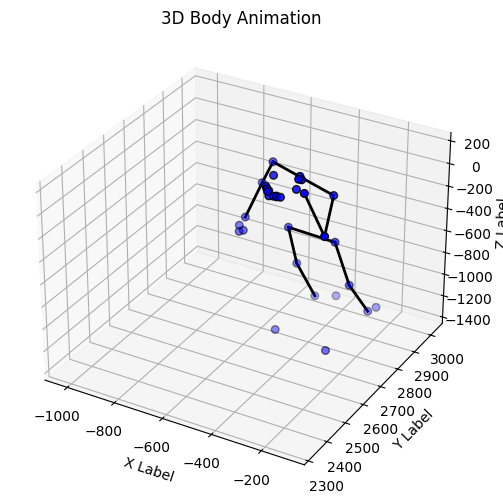

In [10]:
fileexample = r'C:\Users\ahmar\OneDrive - Radboud Universiteit\Mobile Multimodal Lab\freemocap_high and low quality\import_high_quality\output_data\mediapipe_body_3d_xyz.csv'

MT_tracking = pd.read_csv(fileexample)

# Create a figure and axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Define the number of frames
num_frames = len(MT_tracking)

# Define the scatter plot
scatter = ax.scatter([], [], [], marker='o')


# Example connections between landmarks (you would need to define these)
connections = [
    ('left_shoulder', 'right_shoulder'),
    ('left_shoulder', 'left_elbow'),
    ('left_elbow', 'left_wrist'),
    ('right_shoulder', 'right_elbow'),
    ('right_elbow', 'right_wrist'),
    ('left_hip', 'right_hip'),
    ('left_hip', 'left_knee'),
    ('left_knee', 'left_ankle'),
    ('right_hip', 'right_knee'),
    ('right_knee', 'right_ankle')
    # Add more connections based on the Mediapipe body model
]


# Calculate dynamic axis limits based on actual data ranges
x_min, x_max = MT_tracking.filter(like='_x').min().min(), MT_tracking.filter(like='_x').max().max()
y_min, y_max = MT_tracking.filter(like='_y').min().min(), MT_tracking.filter(like='_y').max().max()
z_min, z_max = MT_tracking.filter(like='_z').min().min(), MT_tracking.filter(like='_z').max().max()


# Enhanced Update function for animation
def update(frame):
    ax.clear()
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('3D Body Animation')
    
    # Set the limits dynamically
    ax.set_xlim3d(x_min, x_max)
    ax.set_ylim3d(y_min, y_max)
    ax.set_zlim3d(z_min, z_max)

    # Extract the X, Y, and Z coordinates for the current frame
    frame_data = MT_tracking.iloc[frame]
    x = frame_data.filter(like='_x')
    y = frame_data.filter(like='_y')
    z = frame_data.filter(like='_z')

    # Plot the dots (landmarks)
    scatter = ax.scatter(x, y, z, marker='o', color='blue', s=30, edgecolor='k')  # s=30 for larger dots
    
    # Draw lines to connect the landmarks
    for part1, part2 in connections:
        # Get the coordinates for each pair of landmarks to connect
        x_line = [frame_data[part1 + '_x'], frame_data[part2 + '_x']]
        y_line = [frame_data[part1 + '_y'], frame_data[part2 + '_y']]
        z_line = [frame_data[part1 + '_z'], frame_data[part2 + '_z']]
        ax.plot(x_line, y_line, z_line, color='black', linewidth=2)  # Black lines with thickness 2

    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=1000/60)

# Save the animation
ani.save(output_file, writer='ffmpeg')
print('Saved the enhanced 3D animation!')


saved the animation!


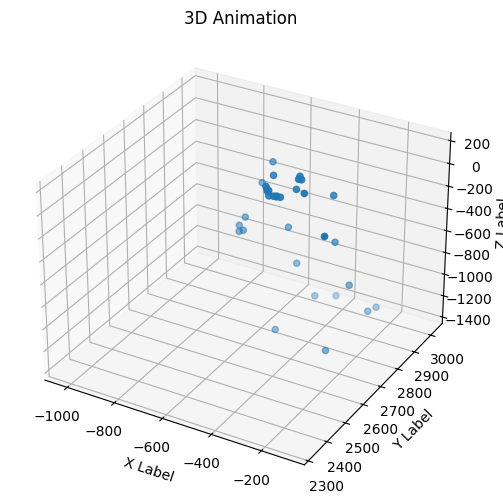

In [9]:

# # 3D tracking checking
# folderstotrack = glob.glob(os.path.abspath('../*'))
# print(os.path.abspath('./*'))
# files = glob.glob(folderstotrack[0]+'/pose-3d/' + '*.csv')
# fileexample = files[1]
# print('Well be looking at the following file: ' + fileexample)

fileexample = r'C:\Users\ahmar\OneDrive - Radboud Universiteit\Mobile Multimodal Lab\freemocap_high and low quality\import_high_quality\output_data\mediapipe_body_3d_xyz.csv'

MT_tracking = pd.read_csv(fileexample)

# Create a figure and axis
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')

# Define the number of frames
num_frames = len(MT_tracking)

# Define the scatter plot
scatter = ax.scatter([], [], [], marker='o')


# Calculate dynamic axis limits based on actual data ranges
x_min, x_max = MT_tracking.filter(like='_x').min().min(), MT_tracking.filter(like='_x').max().max()
y_min, y_max = MT_tracking.filter(like='_y').min().min(), MT_tracking.filter(like='_y').max().max()
z_min, z_max = MT_tracking.filter(like='_z').min().min(), MT_tracking.filter(like='_z').max().max()


# Update function for animation
def update(frame):
    ax.clear()
    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title('3D Animation')
    
    # Set the limits of the axes based on the data ranges
    ax.set_xlim3d(x_min, x_max)
    ax.set_ylim3d(y_min, y_max)
    ax.set_zlim3d(z_min, z_max)  # Flip the Z-axis if needed by multiplying by -1
    
    # Plot the data for the current frame
    frame_data = MT_tracking.iloc[frame]
    x = frame_data.filter(like='_x')
    y = frame_data.filter(like='_y')
    z = frame_data.filter(like='_z')
    
    scatter = ax.scatter(x, y, z, marker='o') #we need to flip the vertical
    return scatter,

# Create the animation
ani = FuncAnimation(fig, update, frames=num_frames, interval=1000/60)

# Save the animation as a video
output_folder = os.path.abspath('./animation_videos_temp')
output_file = os.path.join(output_folder, '3d_animation.mp4')
os.makedirs(output_folder, exist_ok=True)


ani.save(output_file, writer='ffmpeg')
print('saved the animation!')

# #### Now also combine the animated video with the tracking
# videos_to_render_combined(videofolder = '../../Images/temp/', 
#                           newvideofile = "../../Images/temp2/combined_video.mp4",
#                           oldvideotype = '.mp4')
# # Load the video clip
# clip = VideoFileClip("../../Images/temp2/combined_video.mp4")
# clip.ipython_display(width=960,verbose= False, logger= None)

In [6]:
print(output_folder)

c:\Users\ahmar\OneDrive\Documents\GitHub\Mobile-Multimodal-Lab\2_PREPROCESSING\3_MOTION_TRACKING\animation_videos_temp
